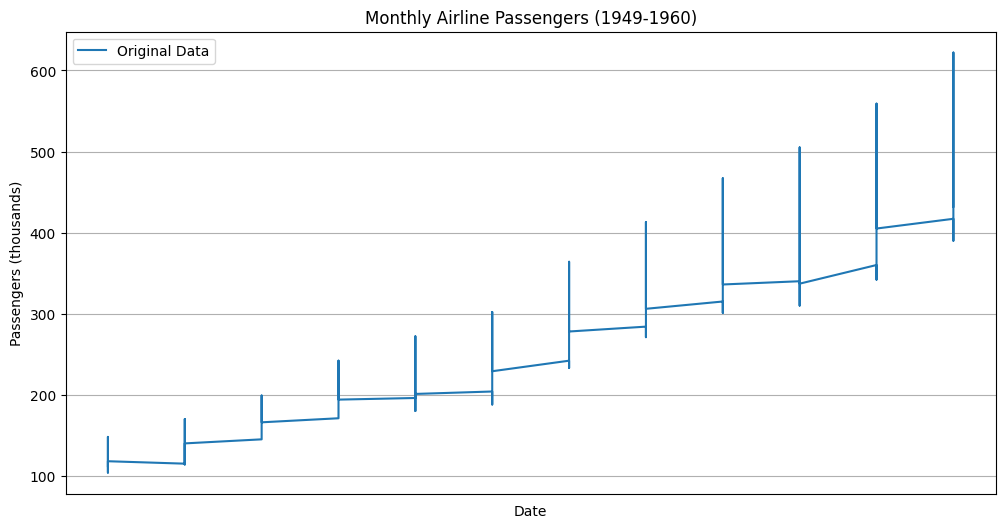

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.structural import UnobservedComponents
import statsmodels.api as sm

# Load the dataset
data = pd.read_stata(r"E:\Downloads\air2.dta")  # Make sure the file is in your working directory

# Convert to proper datetime - handles the date format correctly
data['date'] = pd.to_datetime(data['time'])
data.set_index('date', inplace=True)
data = data[['air']]

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['air'], label='Original Data')
plt.title('Monthly Airline Passengers (1949-1960)')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Model 1: Local Level Model (Random Walk)
model_ll = UnobservedComponents(data['air'], 'llevel')
res_ll = model_ll.fit()
print(res_ll.summary())

# Model 2: Local Linear Trend
model_lt = UnobservedComponents(data['air'], 'lltrend')
res_lt = model_lt.fit()
print(res_lt.summary())

# Model 3: Local Linear Trend with Seasonal (12 months)
model_seas = UnobservedComponents(data['air'], 'lltrend', seasonal=12)
res_seas = model_seas.fit()
print(res_seas.summary())

# Model 4: Trigonometric Seasonal
model_trig = UnobservedComponents(data['air'], 'lltrend', seasonal=12, 
                                stochastic_seasonal=True)
res_trig = model_trig.fit()
print(res_trig.summary())

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Unobserved Components Results                         
Dep. Variable:                    air   No. Observations:                  144
Model:                    local level   Log Likelihood                -705.955
Date:                Fri, 11 Apr 2025   AIC                           1415.909
Time:                        09:17:32   BIC                           1421.835
Sample:                             0   HQIC                          1418.317
                                - 144                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.313e-07     85.482   1.54e-09      1.000    -167.542     167.542
sigma2.level      1136.4043    176.695      6.431      0.000     790.088    1482.721
Ljung-Box (L1) (Q):         

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


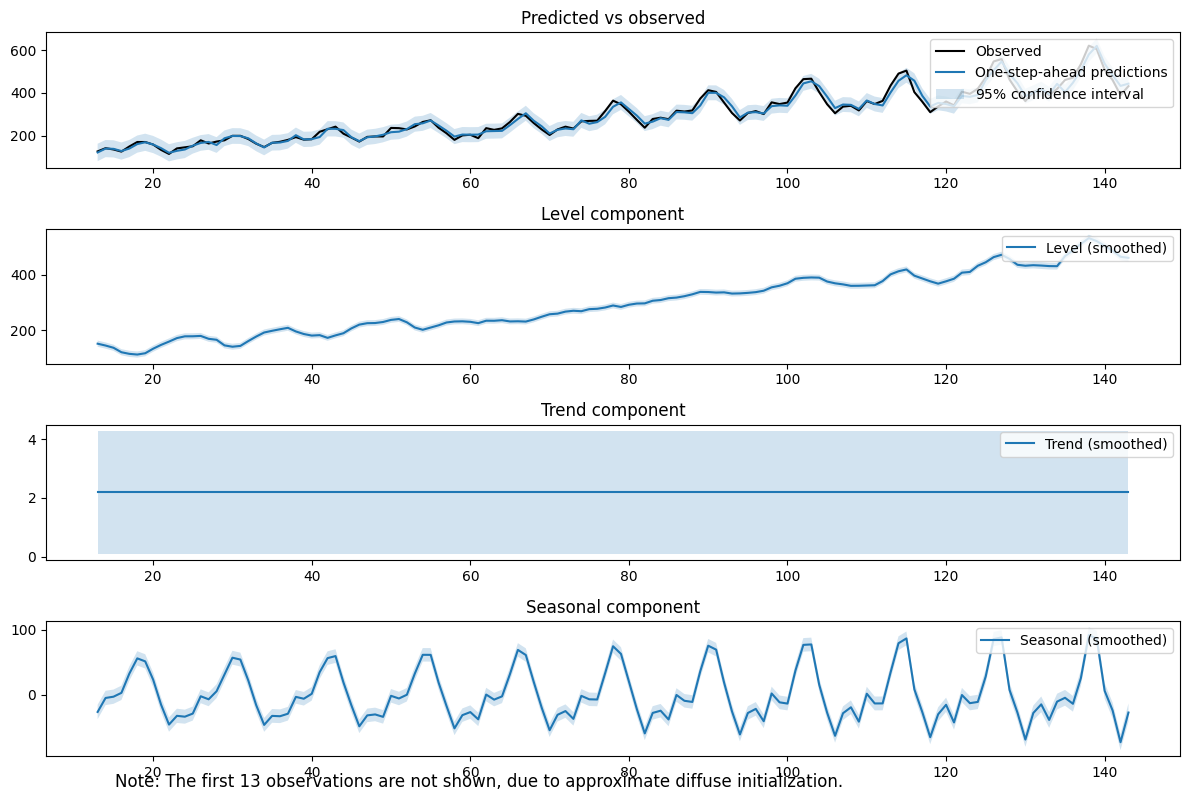

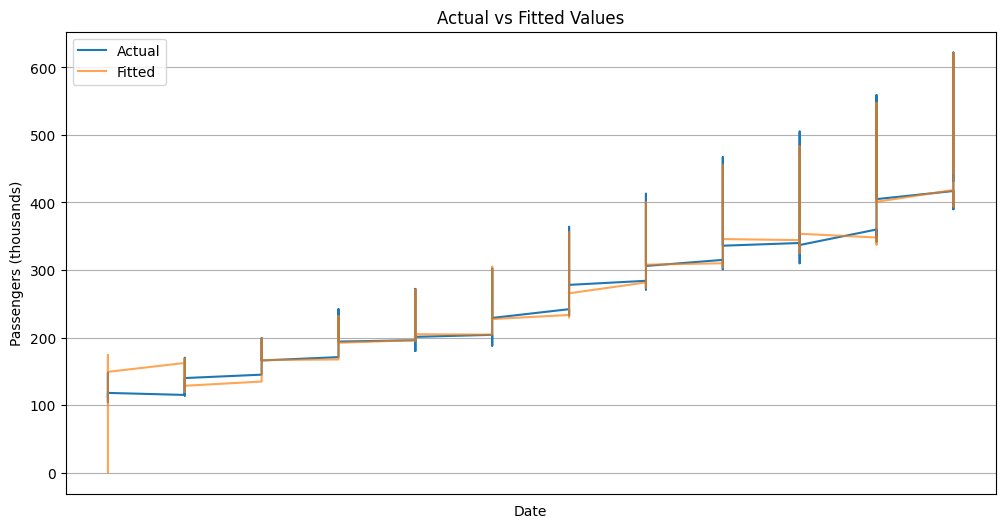

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


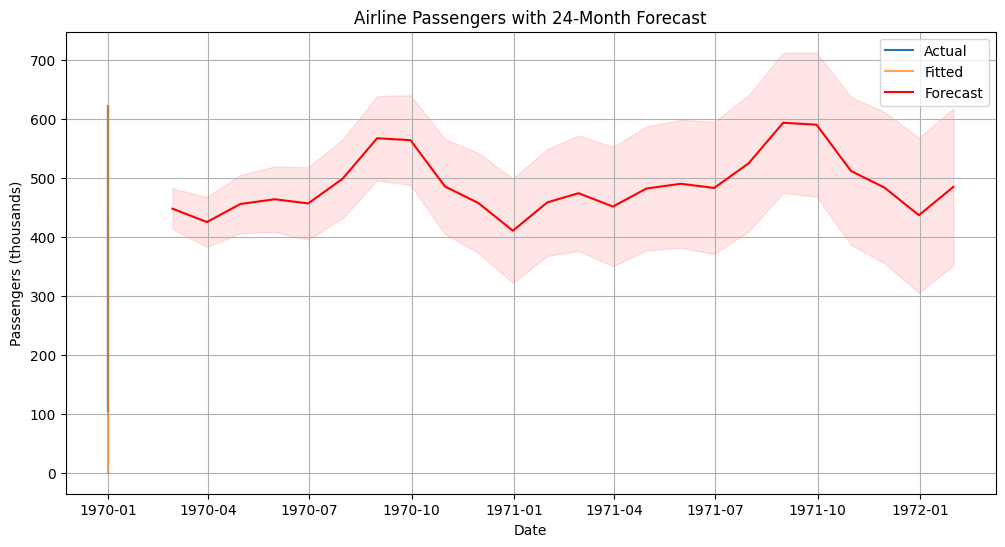

In [8]:
# Plot the components of the best model (Model 4)
fig = res_trig.plot_components(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot the fitted values vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['air'], label='Actual')
plt.plot(data.index, res_trig.fittedvalues, label='Fitted', alpha=0.7)
plt.title('Actual vs Fitted Values')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()

# Forecast the next 24 months
forecast_steps = 24
forecast = res_trig.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps+1, freq='M')[1:]

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['air'], label='Actual')
plt.plot(data.index, res_trig.fittedvalues, label='Fitted', alpha=0.7)
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, 
                 forecast.conf_int()['lower air'], 
                 forecast.conf_int()['upper air'],
                 color='red', alpha=0.1)
plt.title('Airline Passengers with 24-Month Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers (thousands)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Compare models using AIC
models = {
    'Local Level': res_ll,
    'Local Trend': res_lt,
    'Local Trend + Seasonal': res_seas,
    'Local Trend + Stochastic Seasonal': res_trig
}

comparison = pd.DataFrame({
    'Model': models.keys(),
    'AIC': [m.aic for m in models.values()],
    'BIC': [m.bic for m in models.values()],
    'Log-Likelihood': [m.llf for m in models.values()]
}).sort_values('AIC')

print(comparison)

                               Model          AIC          BIC  Log-Likelihood
2             Local Trend + Seasonal  1140.102617  1151.603406     -566.051308
3  Local Trend + Stochastic Seasonal  1140.102617  1151.603406     -566.051308
1                        Local Trend  1413.366691  1422.234172     -703.683345
0                        Local Level  1415.909117  1421.834807     -705.954559
